In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

# Void catalogs

## VoidFinder

In [2]:
VF_filename = '../../void_catalogs/public/nsa_v1_0_1_main_comoving_maximal.txt'

VF_maximals = Table.read(VF_filename, format='ascii.commented_header')

In [10]:
Danny_VF_filename = '../../void_catalogs/SDSS/Cpp_implementation/out3_vollim_dr7_cbp_102709.dat'

Danny_VF_void_info = Table.read(Danny_VF_filename, 
                                format='ascii.no_header', 
                                names=['radius', 'effective radius', 'evolume', 'x', 'y', 'z', 'deltap', 'nfield', 'vol_maxhole'])

In [11]:
Danny_VF_void_info[:5]

radius,effective radius,evolume,x,y,z,deltap,nfield,vol_maxhole
float64,float64,float64,float64,float64,float64,float64,int64,float64
25.697938,33.828442,162156.589027,-55.825541,-186.048184,56.356474,-0.999974,54,0.438378
24.824488,33.888226,163017.825731,-85.640468,-91.185699,221.242694,-0.999973,58,0.393092
24.404156,30.382863,117482.904944,-86.805499,48.161464,257.472952,-0.999986,21,0.518209
24.235927,29.397092,106414.724173,-53.015489,60.470378,149.264466,-0.999978,31,0.560358
23.947534,32.097903,138521.945242,-87.185563,-263.227993,81.876587,-0.999975,44,0.415291


# Compare radius distributions

## Maximal sphere radii

<IPython.core.display.Javascript object>


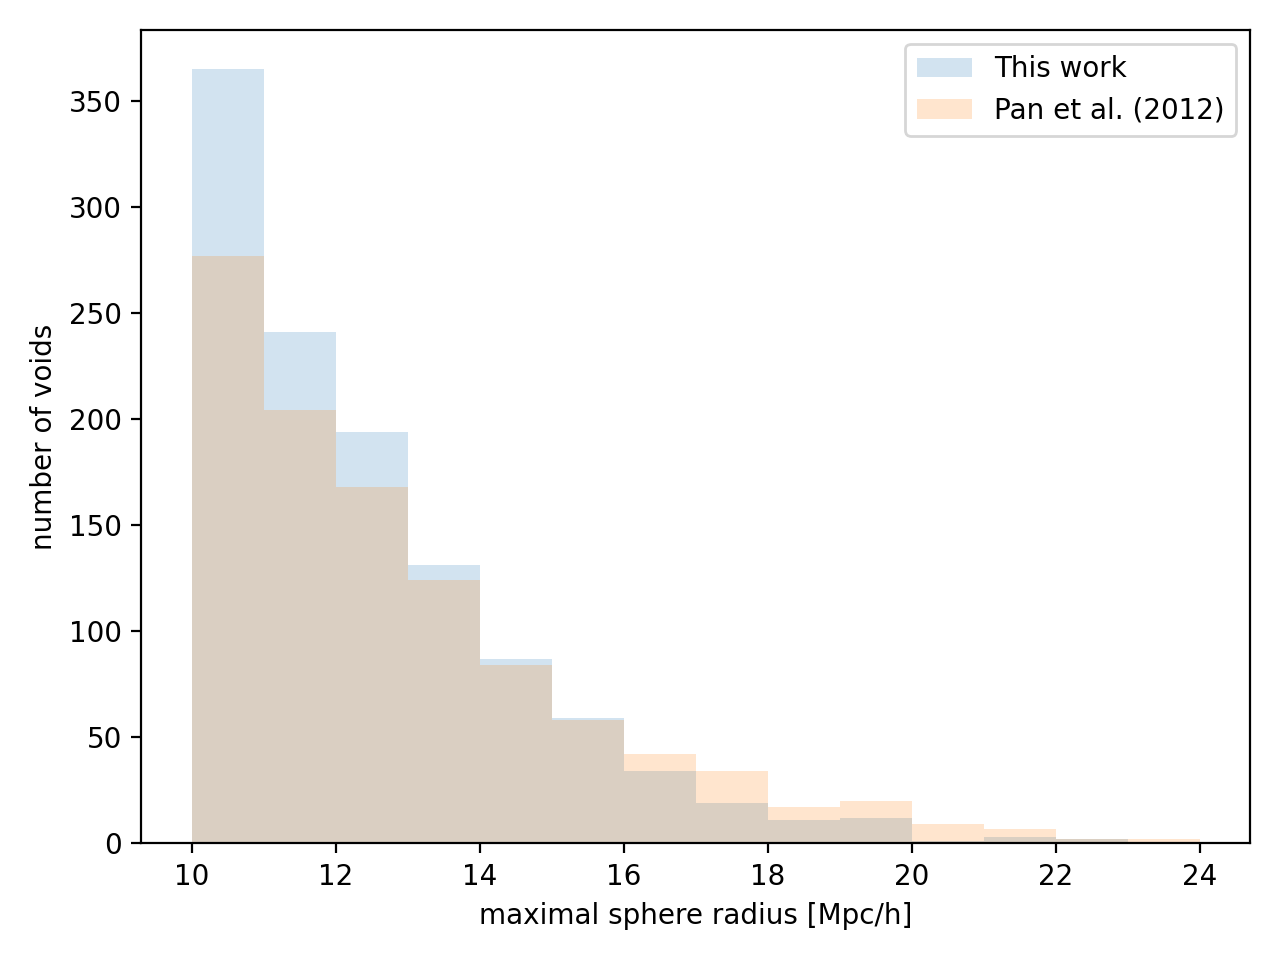

In [13]:
plt.figure(tight_layout=True)

R_bins = np.arange(10, 25, 1)

plt.hist(VF_maximals['radius'], bins=R_bins, alpha=0.2, label='This work')
plt.hist(Danny_VF_void_info['radius'], bins=R_bins, alpha=0.2, label='Pan et al. (2012)')

plt.xlabel('maximal sphere radius [Mpc/h]')
plt.ylabel('number of voids')

plt.legend();

## Effective radius

<IPython.core.display.Javascript object>


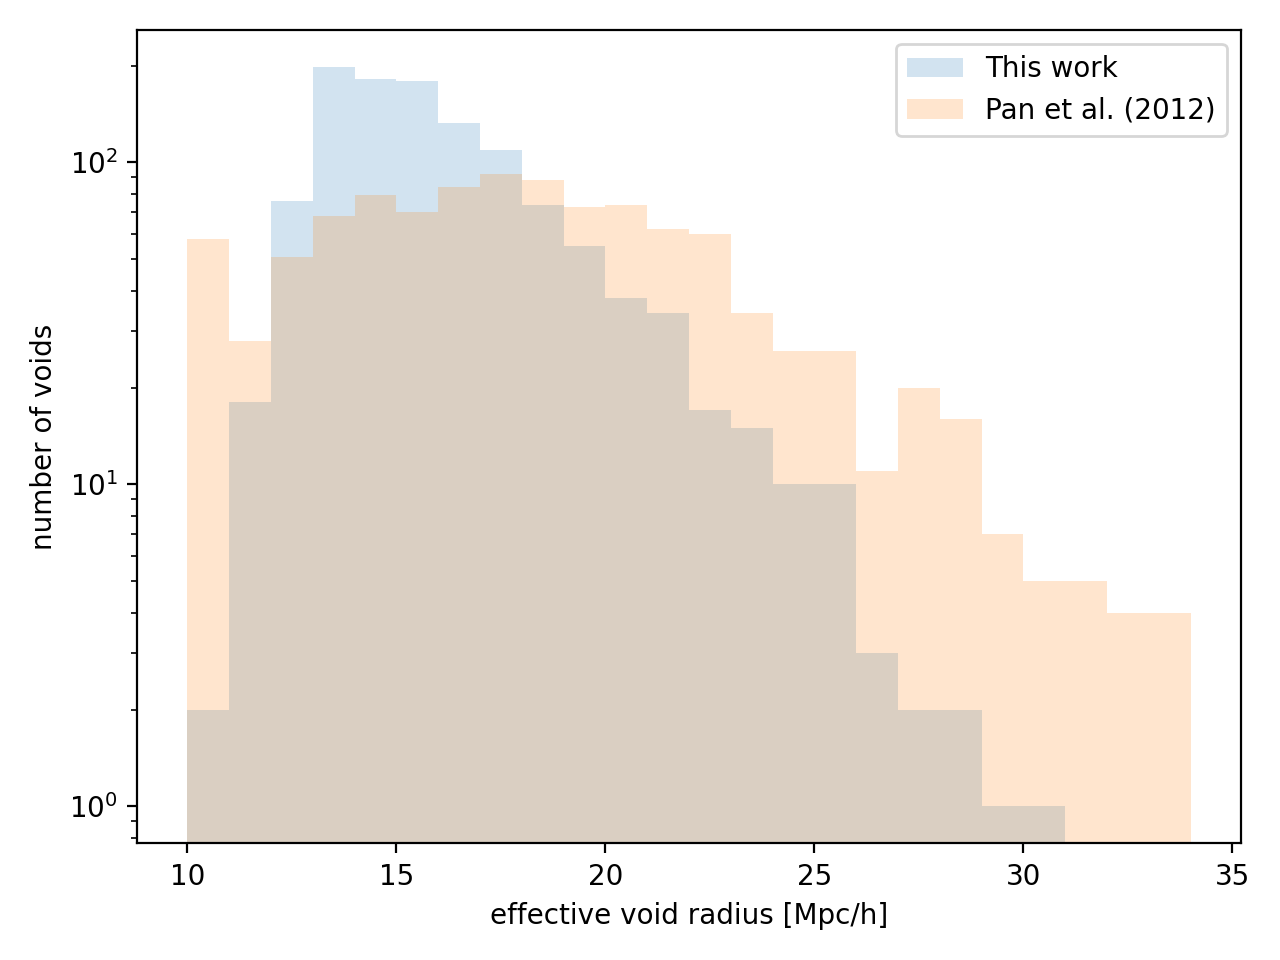

In [15]:
plt.figure(tight_layout=True)

Reff_bins = np.arange(10, 35, 1)

plt.hist((3*VF_maximals['volume']/(4*np.pi))**(1/3), 
         bins=Reff_bins, 
         alpha=0.2, 
         label='This work')
plt.hist(Danny_VF_void_info['effective radius'], 
         bins=Reff_bins, 
         alpha=0.2, 
         label='Pan et al. (2012)')

plt.xlabel('effective void radius [Mpc/h]')
plt.ylabel('number of voids')

plt.yscale('log')

plt.legend();

# Where are the voids located?

<IPython.core.display.Javascript object>


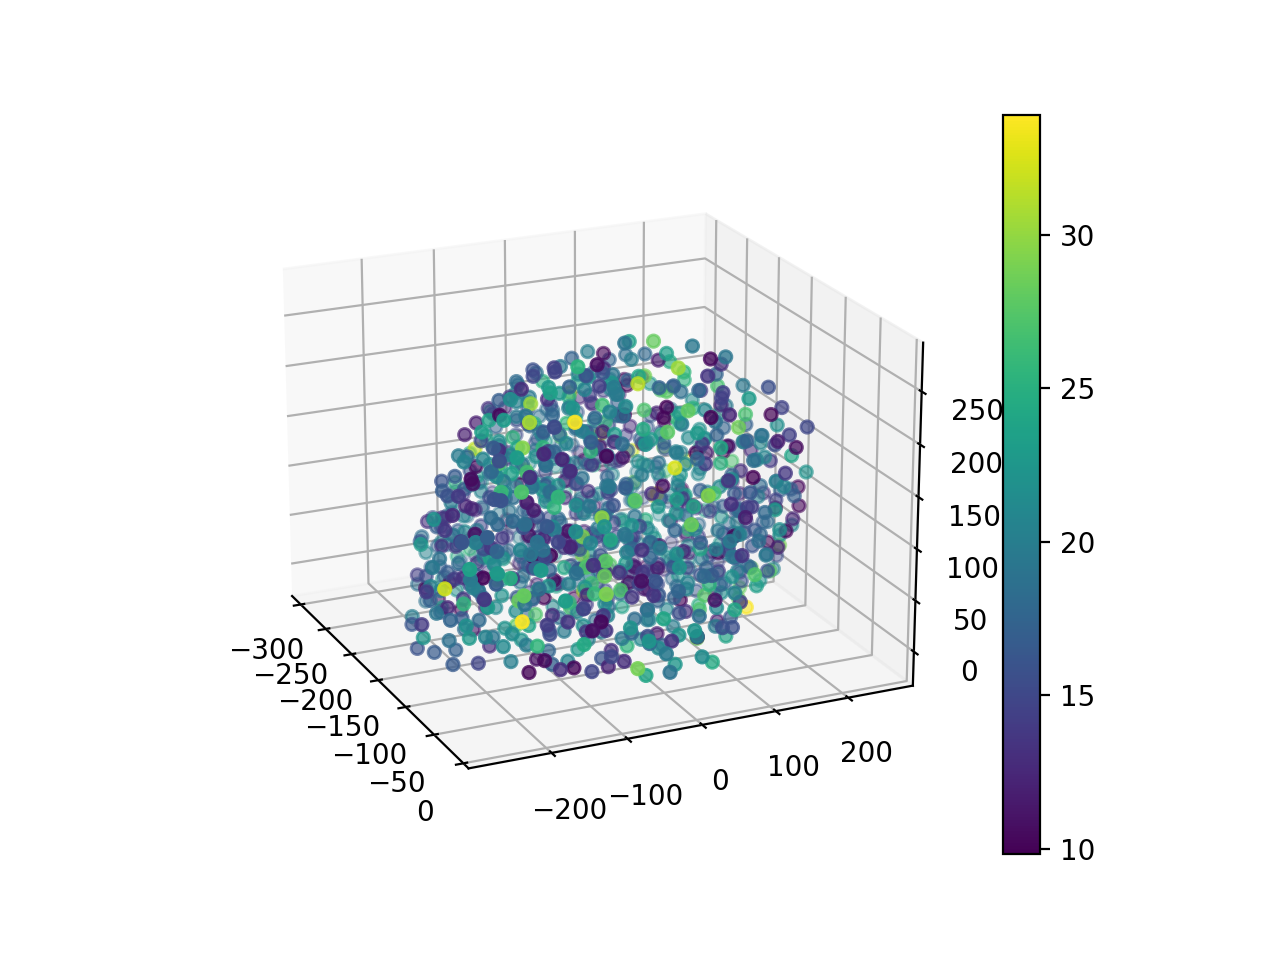

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

p = ax.scatter(Danny_VF_void_info['x'], 
               Danny_VF_void_info['y'], 
               Danny_VF_void_info['z'], 
               c=Danny_VF_void_info['effective radius'])

fig.colorbar(p);

As I expected: it looks like the largest voids of Danny's catalog are along the boundaries of the survey.